In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset1 = pd.read_csv(filepath_or_buffer='data1.csv',header=None,names=['Attribute_1','Attribute_2','Label'])
dataset2 = pd.read_csv(filepath_or_buffer='data2.csv',header=None,names=['Attribute_1','Attribute_2','Label'])
dataset3 = pd.read_csv(filepath_or_buffer='data3.csv',header=None,names=['Attribute_1','Attribute_2','Label'])

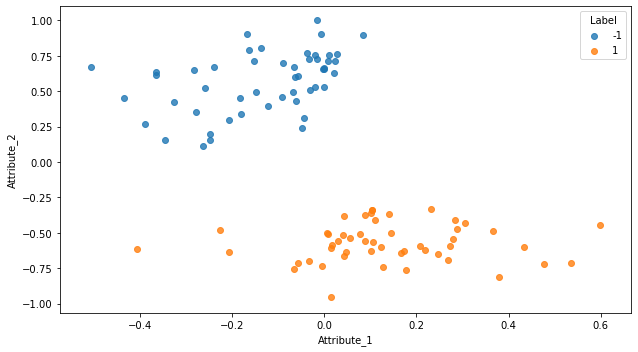

In [3]:
lm1 = sns.lmplot('Attribute_1', 'Attribute_2', dataset1, hue='Label', fit_reg=False, legend_out=False)
ax = lm1.axes
ax[0][0].spines['top'].set_visible(True)
ax[0][0].spines['right'].set_visible(True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

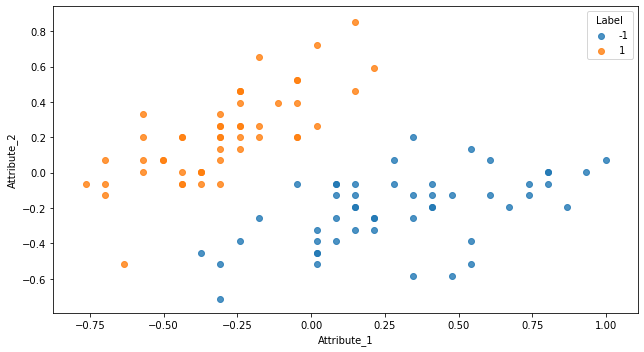

In [4]:
lm2 = sns.lmplot('Attribute_1', 'Attribute_2', dataset2, hue='Label', fit_reg=False, legend_out=False)
ax = lm2.axes
ax[0][0].spines['top'].set_visible(True)
ax[0][0].spines['right'].set_visible(True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

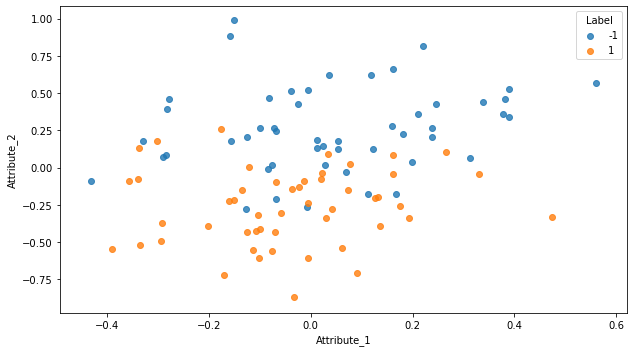

In [5]:
lm3 = sns.lmplot('Attribute_1', 'Attribute_2', dataset3, hue='Label', fit_reg=False, legend_out=False)
ax = lm3.axes
ax[0][0].spines['top'].set_visible(True)
ax[0][0].spines['right'].set_visible(True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [6]:
def PerceptronTrain(dataset,Max_iter):
    b_var = np.ones((dataset.shape[0],1))
    x1_var = dataset['Attribute_1'].values.reshape((dataset.shape[0],1))
    x2_var = dataset['Attribute_2'].values.reshape((dataset.shape[0],1))
    X = np.concatenate((b_var,x1_var,x2_var),axis=1)
    Y = dataset['Label'].values.reshape((dataset.shape[0],1))
    wd = np.zeros(3)
    uu = 0
    for itr in range(Max_iter):
        for (xx,yy) in zip(X,Y):
            aa = np.sum(np.multiply(xx,wd))
            if ((yy*aa)<= 0) :
                wd = wd + np.multiply(yy,xx)
                uu = uu+1
    return wd,uu,X,Y

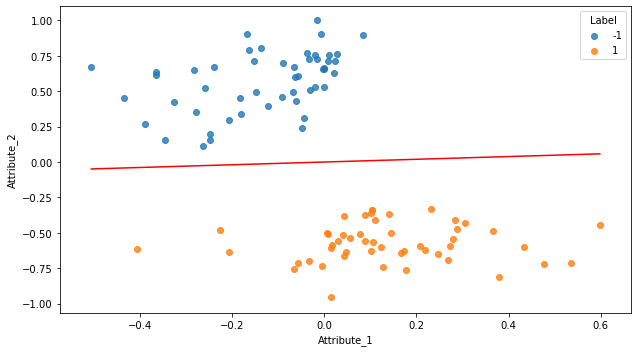

In [7]:
wopt1, upd1, X1, Y1 = PerceptronTrain(dataset1,1000)
wopt1_ls = np.array([((-1*wopt1[0])/wopt1[2]), ((-1*wopt1[1])/wopt1[2])])
X_l1 = np.linspace(min(X1[:,1]),max(X1[:,1]),100)
line1 = np.multiply(wopt1_ls[1],X_l1) + wopt1_ls[0]

lm1 = sns.lmplot('Attribute_1', 'Attribute_2', dataset1, hue='Label', fit_reg=False, legend_out=False)
plt.plot(X_l1,line1,'r')
ax = lm1.axes
ax[0][0].spines['top'].set_visible(True)
ax[0][0].spines['right'].set_visible(True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

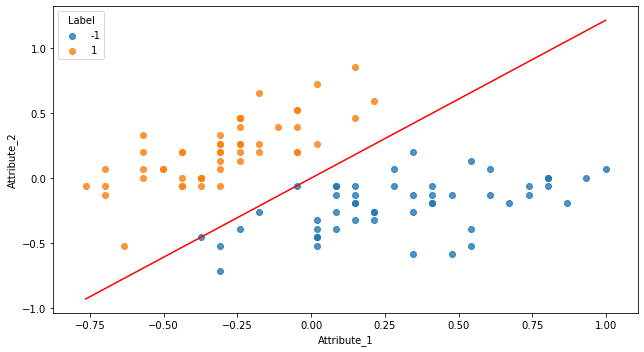

In [8]:
wopt2, upd2, X2, Y2 = PerceptronTrain(dataset2,1000)
wopt2_ls = np.array([((-1*wopt2[0])/wopt2[2]), ((-1*wopt2[1])/wopt2[2])])
X_l2 = np.linspace(min(X2[:,1]),max(X2[:,1]),100)
line2 = np.multiply(wopt2_ls[1],X_l2) + wopt2_ls[0]

lm2 = sns.lmplot('Attribute_1', 'Attribute_2', dataset2, hue='Label', fit_reg=False, legend_out=False)
plt.plot(X_l2,line2,'r')
ax = lm2.axes
ax[0][0].spines['top'].set_visible(True)
ax[0][0].spines['right'].set_visible(True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [9]:
print(wopt1)
print(upd1)

[ 0.        0.142172 -1.47323 ]
2


In [10]:
print(wopt2)
print(upd2)

[ 0.      -1.10918  0.91344]
4


In [11]:
def margin_perceptron(wb,X):
    gammawb = min(np.divide((np.abs(np.sum(np.multiply(X,wb),axis=1))),(np.sqrt(np.sum(np.square(wb[1:]))))))
    return gammawb
    

In [12]:
gammawb1 = margin_perceptron(wopt1,X1)
upd1_ub = np.divide(1,np.square(gammawb1))
print('Margin = {}'.format(gammawb1))
print('Update upper bound = {}'.format(upd1_ub))

Margin = 0.13686820945402078
Update upper bound = 53.38199847237111


In [13]:
gammawb2 = margin_perceptron(wopt2,X2)
upd2_ub = np.divide(1,np.square(gammawb2))
print('Margin = {}'.format(gammawb2))
print('Update upper bound = {}'.format(upd2_ub))

Margin = 0.0002648936222502777
Update upper bound = 14251382.47956429
